<a href="https://colab.research.google.com/github/seonhe/PyTorch/blob/master/Block_Depth_after_Pointwiseconvolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytorch-lightning
!pip install lightning-bolts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import torch
import torchvision
from pytorch_lightning import seed_everything
from pl_bolts.datamodules import CIFAR10DataModule, TinyCIFAR10DataModule
from pl_bolts.transforms.dataset_normalizations import cifar10_normalization
import matplotlib.pyplot as plt
import numpy as np


PATH_DATASETS = os.environ.get('PATH_DATASETS', '../datasets')
AVAIL_GPUS = min(1, torch.cuda.device_count())
BATCH_SIZE = 512 if AVAIL_GPUS else 64
NUM_WORKERS = int(os.cpu_count()/2)
TEST_ONLY = False

test_transforms = [
        torchvision.transforms.ToTensor(),
        cifar10_normalization(),        
        torchvision.transforms.Lambda(lambda x: x.clamp(min = -1, max = 1)),
        torchvision.transforms.Lambda(lambda x: x * 127),   
        torchvision.transforms.Lambda(lambda x: x.floor())  
]

train_transforms = torchvision.transforms.Compose(
    [
        torchvision.transforms.RandomCrop(32, padding=4),
        torchvision.transforms.RandomHorizontalFlip(),
    ] 
    + test_transforms
)

test_transforms = torchvision.transforms.Compose(test_transforms)

cifar10_dm = CIFAR10DataModule(
    data_dir = PATH_DATASETS,
    batch_size = BATCH_SIZE,
    num_workers = NUM_WORKERS,
    train_transforms = train_transforms,
    test_transforms = test_transforms,
    val_transforms = test_transforms,
)

seed_everything(seed=1234, workers=True)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/datamodule.py:61: LightningDeprecationWarning: DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
  "DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/datamodule.py:65: LightningDeprecationWarning: DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.
  "DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/datamodule.py:69: LightningDeprecationWarning: DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7.
  "DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7."
Global seed set to 1234


1234

In [3]:
from xnor_net import Model

binary_structure = [{'in_channels':1, 'out_channels':128, 'stride':1, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             {'in_channels':128, 'out_channels':128, 'stride':2, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             {'in_channels':128, 'out_channels':256, 'stride':1, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             {'in_channels':256, 'out_channels':256, 'stride':2, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             {'in_channels':256, 'out_channels':512, 'stride':1, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             {'in_channels':512, 'out_channels':512, 'stride':2, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             #FCL
             {'in_channels':512, 'out_channels':1024, 'stride':1, 'kernel_size':4, 'padding':0, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0.5, 'avgpool':'no'},
             {'in_channels':1024, 'out_channels':1024, 'stride':1, 'kernel_size':1, 'padding':0, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0.5, 'avgpool':'no'},
             {'in_channels':1024, 'out_channels':10, 'stride':1, 'kernel_size':1, 'padding':0, 'conv':'scaled_sign', 'act_fn':'none', 'dropout':0, 'avgpool':'no'},]

DGAP_binary_structure = [{'in_channels':3, 'out_channels':128, 'stride':1, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             {'in_channels':128, 'out_channels':128, 'stride':2, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             {'in_channels':128, 'out_channels':256, 'stride':1, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             {'in_channels':256, 'out_channels':256, 'stride':2, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             {'in_channels':256, 'out_channels':512, 'stride':1, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             {'in_channels':512, 'out_channels':512, 'stride':2, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             #DGAP
             {'in_channels':512, 'out_channels':528, 'stride':1, 'kernel_size':4, 'padding':0, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0.5, 'avgpool':'pool'},
             {'in_channels':528, 'out_channels':10, 'stride':1, 'kernel_size':1, 'padding':0, 'conv':'scaled_sign', 'act_fn':'none', 'dropout':0, 'avgpool':'no'},]

BLOCK_DEPTHWISE_binary_structure = [{'in_channels':3, 'out_channels':128, 'stride':1, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             {'in_channels':128, 'out_channels':128, 'stride':2, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             {'in_channels':128, 'out_channels':256, 'stride':1, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             {'in_channels':256, 'out_channels':256, 'stride':2, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             {'in_channels':256, 'out_channels':512, 'stride':1, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             #depthwise
             {'in_channels':512, 'out_channels':512, 'stride':2, 'kernel_size':3, 'padding':1, 'conv':'depthwise', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             #pointwise
             {'in_channels':512, 'out_channels':512, 'stride':1, 'kernel_size':1, 'padding':0, 'conv':'pointwise', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             #FCL
             {'in_channels':512, 'out_channels':1024, 'stride':1, 'kernel_size':4, 'padding':0, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0.5, 'avgpool':'no'},
             {'in_channels':1024, 'out_channels':1024, 'stride':1, 'kernel_size':1, 'padding':0, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0.5, 'avgpool':'no'},
             {'in_channels':1024, 'out_channels':10, 'stride':1, 'kernel_size':1, 'padding':0, 'conv':'scaled_sign', 'act_fn':'none', 'dropout':0, 'avgpool':'no'},]

SEPARABLE_DEPTHWISE_binary_structure = [{'in_channels':3, 'out_channels':128, 'stride':1, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             {'in_channels':128, 'out_channels':128, 'stride':2, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             {'in_channels':128, 'out_channels':256, 'stride':1, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             {'in_channels':256, 'out_channels':256, 'stride':2, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             {'in_channels':256, 'out_channels':512, 'stride':1, 'kernel_size':3, 'padding':1, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             #separable
             {'in_channels':512, 'out_channels':512, 'stride':2, 'kernel_size':3, 'padding':1, 'conv':'separable', 'act_fn':'sign', 'dropout':0, 'avgpool':'no'},
             #FCL
             {'in_channels':512, 'out_channels':1024, 'stride':1, 'kernel_size':4, 'padding':0, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0.5, 'avgpool':'no'},
             {'in_channels':1024, 'out_channels':1024, 'stride':1, 'kernel_size':1, 'padding':0, 'conv':'scaled_sign', 'act_fn':'sign', 'dropout':0.5, 'avgpool':'no'},
             {'in_channels':1024, 'out_channels':10, 'stride':1, 'kernel_size':1, 'padding':0, 'conv':'scaled_sign', 'act_fn':'none', 'dropout':0, 'avgpool':'no'},]


model = Model(structure=BLOCK_DEPTHWISE_binary_structure, 
              adam_init_lr=1e-2, 
              lr_patience=50,
              limit_conv_weight=True,
              limit_bn_weight=True)
print(model)
print(model.hparams)

Model(
  (blocks): ModuleList(
    (0): BasicBlock(
      (GeneralConv2d): GeneralConv2d()
      (BatchNorm2d): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (Shift): Shift(out_channels=128)
      (Clamp): Clamp
      (BinaryActivation): BinaryActivation()
    )
    (1): BasicBlock(
      (GeneralConv2d): GeneralConv2d()
      (MaxPool2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (BatchNorm2d): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (Shift): Shift(out_channels=128)
      (Clamp): Clamp
      (BinaryActivation): BinaryActivation()
    )
    (2): BasicBlock(
      (GeneralConv2d): GeneralConv2d()
      (BatchNorm2d): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (Shift): Shift(out_channels=256)
      (Clamp): Clamp
      (BinaryActivation): BinaryActivation()
    )
    (3): BasicBlock(
      (GeneralConv2d): GeneralConv2

In [4]:
real_model = Model.load_from_checkpoint('/content/drive/MyDrive/checkpoint/xnornet_cifar10_BLOCK_DEPTHWISE/lightning_logs/version_3/checkpoints/epoch=306-val_loss=0.4763-val_acc=0.8614.ckpt')
model.load_state_dict(real_model.state_dict(), strict=False)

<All keys matched successfully>

In [5]:
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import LearningRateMonitor
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger

checkpoint_callback = ModelCheckpoint(filename='{epoch}-{val_loss:.4f}-{val_acc:.4f}', monitor='val_acc', mode='max')
trainer = Trainer(
    max_epochs=-1,
    gpus=AVAIL_GPUS,
    logger=TensorBoardLogger('/content/drive/MyDrive/checkpoint/xnornet_cifar10_DGAP_last1/', log_graph=True),
    # logger=TensorBoardLogger('lightning_logs/', name='Real', log_graph=True),
    callbacks=[LearningRateMonitor(logging_interval='step'), 
               EarlyStopping(monitor='val_acc', mode='max', patience=100),
               checkpoint_callback],
    deterministic=True,
#    gradient_clip_val = 0.5
)


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/datamodule.py:127: LightningDeprecationWarning: DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7.
  "DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7."
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/content/bcnn.py:101: TracerWarning: Converting a tensor to a NumPy array might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  oy=oy.detach().numpy()


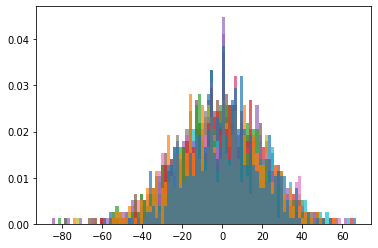

/content/bcnn.py:101: TracerWarning: Converting a tensor to a NumPy array might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  oy=oy.detach().numpy()


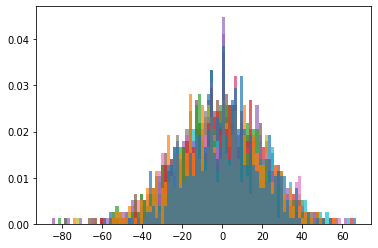

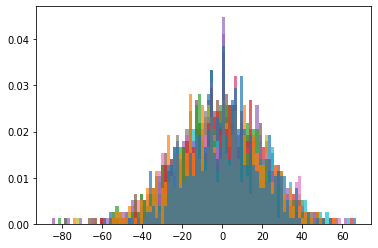

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:245: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,


Testing: 0it [00:00, ?it/s]

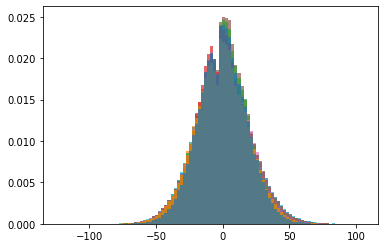

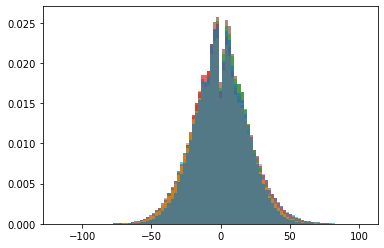

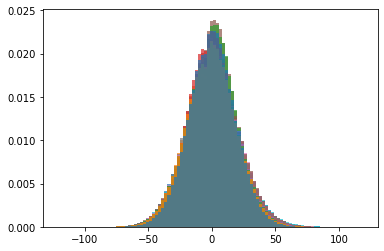

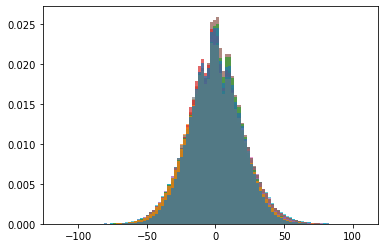

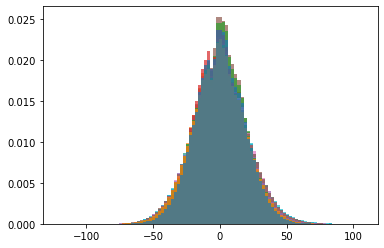

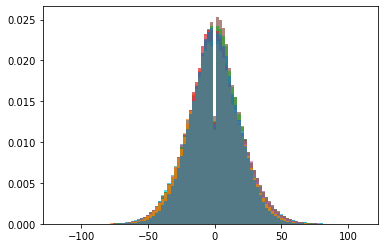

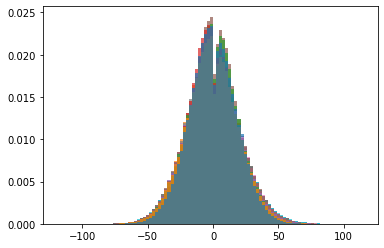

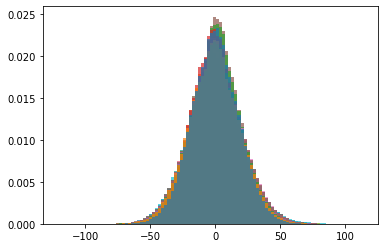

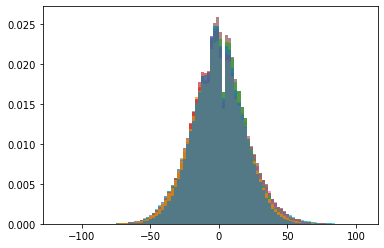

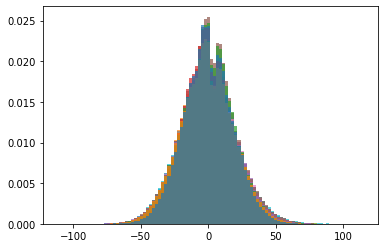

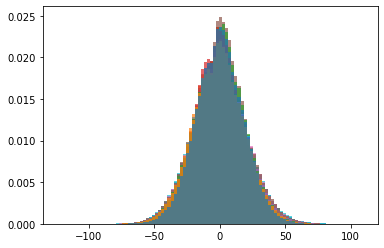

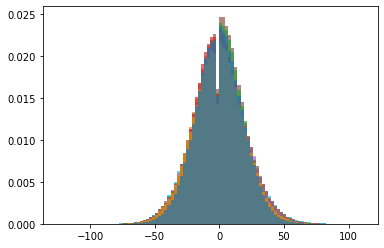

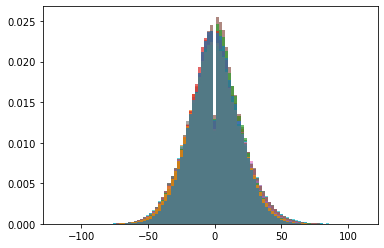

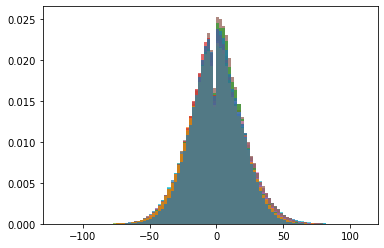

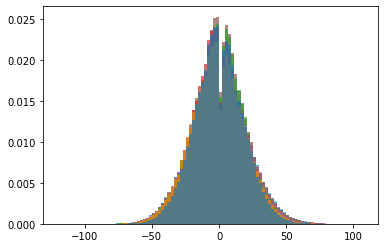

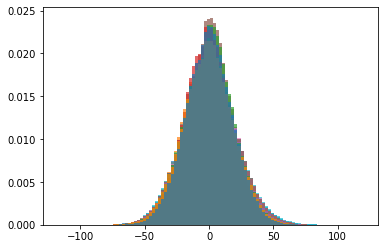

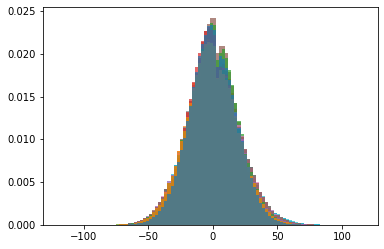

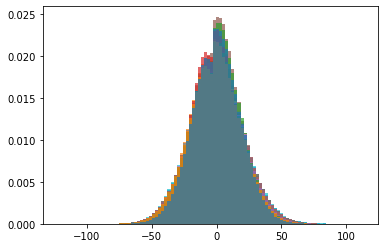

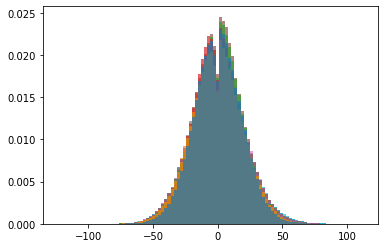

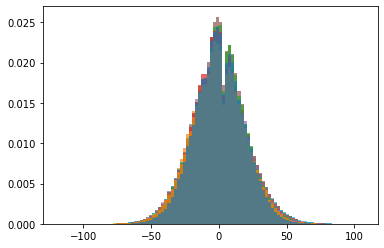

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.8465999960899353
        test_loss           0.5123138427734375
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
None



In [6]:
#trainer.fit(model, datamodule=cifar10_dm)
trainer.test(model, datamodule=cifar10_dm)
print(checkpoint_callback.best_model_score)
print(checkpoint_callback.best_model_path)